<a href="https://colab.research.google.com/github/yeop6033/datamining/blob/main/TItanic_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
testdata = files.upload()
traindata = files.upload()
genderdata=files.upload()

Saving test.csv to test.csv


Saving train.csv to train.csv


Saving gender_submission.csv to gender_submission.csv


In [5]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("gender_submission.csv")

Sex 는 남/여 로 구분하여 생존여부 시각화, .\
Name 은 어떻게 나눌 수 있을까?\
 Pclass, Cabin 좌석별로  판단.\
 -> 과연? 침몰시간에 사람들이 모두 자신들의 좌석에 있었다는 확신이 부족하다. 침몰시간을 살펴보자.\
Fare(요금)에 대한 것으로 생존과 연관지어 생각할 수 있는지 판단\
 Embarked 승선과 생존여부 연관성 확인

In [3]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
sns.set()

In [6]:
age_nan_rows = train[train['Age'].isnull()]

In [7]:
age_nan_rows.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [8]:
from sklearn.preprocessing import LabelEncoder
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [9]:
train['Name'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train['Name'].unique()
titles
test['Name'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test_titles = test['Name'].unique()
test_titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

나이의 nan값을 채워주기 위해서, 이름의 성별로 중간값을 구하자.
 남자별, 여자별로 나누어도 좋지만 성별로 하는 것이 더 정확하지 않을까? \
 하지만 성별로 나누는 것도 정확한 기준이 부족하다. 해당 부분에 대해서 좀 더 생각해볼 필요가 있다.

In [10]:
train['Age'].fillna(-1, inplace=True)
test['Age'].fillna(-1, inplace=True)
 
medians = dict()
for title in titles:
    median = train.Age[(train["Age"] != -1) & (train['Name'] == title)].median()
    medians[title] = median

In [12]:
for index, row in train.iterrows():
    if row['Age'] == -1:
        train.loc[index, 'Age'] = medians[row['Name']]
 
for index, row in test.iterrows():
    if row['Age'] == -1:
        test.loc[index, 'Age'] = medians[row['Name']]
 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [14]:
medians

{'Mr': 30.0,
 'Mrs': 35.0,
 'Miss': 21.0,
 'Master': 3.5,
 'Don': 40.0,
 'Rev': 46.5,
 'Dr': 46.5,
 'Mme': 24.0,
 'Ms': 28.0,
 'Major': 48.5,
 'Lady': 48.0,
 'Sir': 49.0,
 'Mlle': 24.0,
 'Col': 58.0,
 'Capt': 70.0,
 'the Countess': 33.0,
 'Jonkheer': 38.0}

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test_age_nan_rows = test[test['Age'].isnull()]
test_age_nan_rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


이름별로 산사람 죽은사람 확인

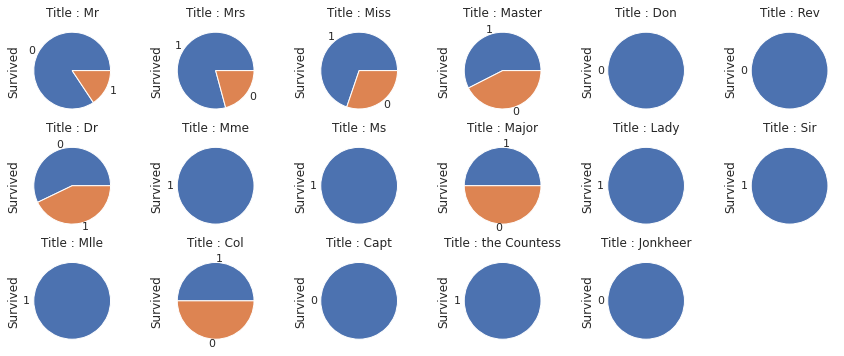

In [20]:
fig = plt.figure(figsize=(15,6))
 
i=1
for title in train['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train.Survived[train['Name'] == title].value_counts().plot(kind='pie')
    i += 1

In [21]:
#이름을 숫자로 변경하는 작업
#중요함
title_replace = {
    'Don':0,
    'Rev':0,
    'Capt':0,
    'Jonkheer':0,
    'Mr':1,
    'Dr':2,
    'Major':3,
    'Col':3,
    'Master':4,
    'Miss':5,
    'Mrs':6,
    'Mme':7,
    'Ms':7,
    'Lady':7,
    'Sir':7,
    'Mlle':7,
    'the Countess':7
}

In [22]:
train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Dona 이분이 test데이터에만 있음

In [24]:
test['Name'].unique()
test[test['Name'] == 'Dona']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,Dona,0,39.0,0,0,PC 17758,108.9,C105,C


In [25]:
train['Name'] = train['Name'].apply(lambda x: title_replace.get(x))

In [26]:
test['Name'] = test['Name'].apply(lambda x: title_replace.get(x))

In [27]:
test[test['Name'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,NaN,0,39.0,0,0,PC 17758,108.9,C105,C


In [28]:
test[test['Sex'] == 0]['Name'].mean()
train[train['Sex'] == 0]['Name'].mean()
test[test['Name'].isnull()]['Sex']
test[test['Name'].isnull()]['Name']

414   NaN
Name: Name, dtype: float64

In [29]:
test['Name'] = test['Name'].fillna(value=train[train['Sex'] == 0]['Name'].mean())

In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1.0,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,6.0,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1.0,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1.0,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,6.0,0,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
test.isnull().sum()
# train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
train_test_data = [train,test]
train_test_data

[     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  \
 0              1         0       3     1    1  22.0      1      0   
 1              2         1       1     6    0  38.0      1      0   
 2              3         1       3     5    0  26.0      0      0   
 3              4         1       1     6    0  35.0      1      0   
 4              5         0       3     1    1  35.0      0      0   
 ..           ...       ...     ...   ...  ...   ...    ...    ...   
 886          887         0       2     0    1  27.0      0      0   
 887          888         1       1     5    0  19.0      0      0   
 888          889         0       3     5    0  21.0      1      2   
 889          890         1       1     1    1  26.0      0      0   
 890          891         0       3     1    1  32.0      0      0   
 
                Ticket     Fare Cabin Embarked  
 0           A/5 21171   7.2500   NaN        S  
 1            PC 17599  71.2833   C85        C  
 2    STON/

In [41]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age']<=10, 'Age'] = 0
    dataset.loc[(dataset['Age']>10)&(dataset['Age']<=16), 'Age'] = 1,
    # dataset.loc[(dataset['Age']>16)&(dataset['Age']<=20), 'Age'] = 2,
    # dataset.loc[(dataset['Age']>20)&(dataset['Age']<=26), 'Age'] = 3,
    # dataset.loc[(dataset['Age']>26)&(dataset['Age']<=30), 'Age'] = 4,
    # dataset.loc[(dataset['Age']>30)&(dataset['Age']<=36), 'Age'] = 5,
    # dataset.loc[(dataset['Age']>36)&(dataset['Age']<=40), 'Age'] = 6,
    # dataset.loc[(dataset['Age']>40)&(dataset['Age']<=46), 'Age'] = 7,
    # dataset.loc[(dataset['Age']>46)&(dataset['Age']<=50), 'Age'] = 8,
    # dataset.loc[(dataset['Age']>50)&(dataset['Age']<=60), 'Age'] = 9,
    # dataset.loc[ dataset['Age']>60, 'Age'] = 10

ValueError: ignored

In [47]:
dataset[['Age']]>10

,Age
0,True
1,True
2,True
3,True
4,True
...,...
886,True
887,True
888,True
889,True
